# Analiza Pokemonów

## To do
1. Na podstawie inormacji zawartych w DB wyciągnąć wnioski na temat tego jakie pokemony można stworzyć w następnej generacji.
2. Heatmapa Efektywności typów względem siebie
3. Pokazanie statystyk pokemona i jak imają się do typów[pokazać to na jednej strone z wieloma grafami] pokazać średnią i odstające wyniki. Czy typ ma znaczenie na statystyki
4. to samo co 3 pkcie ale tu z dwoma typami 
5. pokazać czy typ pokemona ma znaczenie na % danej płci, i ogólnikowe wystepowanie danej płci wszsytkich pokemonów ile pokemonów nie ma płci
6. pokazać co ma znaczenie przy zdobywaniu doświadzczenia
7. czy typ pokemona ma znaczenia na jego wzrost i wagę
8. pokazać co ma znaczenie przy łapaniu pokemona
9. pokazać jakie pokemony legendarne powstały i ile ich jest na podstawie typu i jakie potencjalne legendarne pokemony można stworzyć w przyszych generacjach
10. na podstawie wagi wzrostu i typu sprawdzić korelacje miedzy danymi 
11. konwersja statystyk do Pokemon Go
12. pokazać różnicę w statystykach gier pokemon z pokemon go

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure as fig
from matplotlib import colorbar as cb
import seaborn as sns
import scipy as sc
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.ticker import MultipleLocator

#Słownik Typów i odpowadającym im kolorów
pokemon_colors = {
    'Bug': '#A8B820',
    'Electric': '#F8D030',
    'Fairy': '#EE99AC',
    'Fighting': '#C03028',
    'Fire': '#F08030',
    'Flying': '#A890F0',
    'Grass': '#78C850',
    'Ice': '#98D8D8',
    'Poison': '#A040A0',
    'Psychic': '#F85888',
    'Rock': '#B8A038',
    'Steel': '#B8B8D0',
    'Water': '#6890F0',
    'Dragon': '#7038F8',
    'Dark': '#705848',
    'Ghost': '#705898',
    'Ground': '#E0C068',
    'Normal': '#A8A878'
}

### Wczytanie bazy danych

In [2]:
PokemonDB = pd.read_csv(r'PokemonDB_updated.csv')
PokemonDB

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,7,Steel,Flying,Launch Pokémon,1,101,107,103,...,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
797,798,Kartana,7,Grass,Steel,Drawn Sword Pokémon,1,181,59,131,...,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
798,799,Guzzlord,7,Dark,Dragon,Junkivore Pokémon,1,101,97,53,...,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5
799,800,Necrozma,7,Psychic,NaN,Prism Pokémon,1,107,127,101,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


### Random state na podstawie numeru w pokedesie

In [3]:
rs = PokemonDB[PokemonDB['name'] == 'Pikachu']['pokedex_number'].values[0]

### Informacje na temat PokemonDB

In [4]:
PokemonDB.head()

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0


### Wczytanie bazy danych typing_chart.csv i wypełnienie pustych komórek jedynkami

In [5]:
TypingChart = pd.read_csv(r'Typing_Chart.csv',index_col=0)
TypingChart = TypingChart.fillna(1)
TypingChart = TypingChart.sort_index(axis =  1)
TypingChart = TypingChart.sort_index()
TypingChart


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Types,,,,,,,,,,,,,,,,,,
Bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0
Dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,1.0
Fighting,0.5,2.0,1.0,1.0,0.5,1.0,1.0,0.5,0.0,1.0,1.0,2.0,2.0,0.5,0.5,2.0,2.0,1.0
Fire,2.0,1.0,0.5,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,0.5,2.0,0.5
Flying,2.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,0.5,0.5,1.0
Ghost,1.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0


### TypingChart to tablica w której są zapisane słąbości i mocne strony każdego z typów

In [6]:
TypingChart.head()

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Types,,,,,,,,,,,,,,,,,,
Bug,1.0,2.0,1.0,1.0,0.5,0.5,0.5,0.5,0.5,2.0,1.0,1.0,1.0,0.5,2.0,1.0,0.5,1.0
Dark,1.0,0.5,1.0,1.0,0.5,0.5,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
Dragon,1.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
Electric,1.0,1.0,0.5,0.5,1.0,1.0,1.0,2.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
Fairy,1.0,2.0,2.0,1.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,0.5,1.0


## Grupowanie pokemonów względem Głównego typu i zliczenie ich

In [7]:
df = PokemonDB[PokemonDB['type2'].isna()]
df = df['type1'].value_counts().reset_index()
df

,type1,count
0,Normal,61
1,Water,61
2,Grass,37
3,Psychic,35
4,Fire,27
5,Electric,26
6,Fighting,22
7,Bug,18
8,Fairy,16
9,Poison,13


## Grupowanie pokemonów z dwoma typami i zgrupowanie ich na podstawie typu Głównego

In [8]:
type1_and_type2 = PokemonDB[PokemonDB['type2'].notna()]

# Liczba Pokémonów tylko z typem pierwszym i drugim
type_combination_counts = type1_and_type2.groupby(['type1', 'type2']).size().reset_index(name='count')
print("\nLiczba Pokémonów z type1 i type2:")
type_combination_counts.sample(5,random_state=rs)


Liczba Pokémonów z type1 i type2:


,type1,type2,count
111,Psychic,Steel,1
97,Poison,Dark,3
108,Psychic,Flying,6
65,Grass,Grass,1
41,Fire,Fighting,6


### Stworzenie uproszczonej bazy danych z wagą pokemonów

In [9]:
weightsDB = PokemonDB.loc[:,["pokedex_number","type1","type2","weight_kg"]]
weightsDB['weight_kg'] = pd.to_numeric(weightsDB["weight_kg"])
weightsDB.to_csv(r'WeightsDB.csv')

weightsDB

,pokedex_number,type1,type2,weight_kg
0,1,Grass,Poison,6.9
1,2,Grass,Poison,13.0
2,3,Grass,Poison,100.0
3,4,Fire,NaN,8.5
4,5,Fire,NaN,19.0
...,...,...,...,...
796,797,Steel,Flying,999.9
797,798,Grass,Steel,0.1
798,799,Dark,Dragon,888.0
799,800,Psychic,NaN,230.0


In [10]:
weightsDB.sample()

,pokedex_number,type1,type2,weight_kg
596,597,Grass,Steel,18.8


### Zliczenie pokwmonów  na podstawie dystrybucji typów

In [11]:
two_typesdb = PokemonDB.dropna(subset=['type2'])
two_typesdb.to_csv(r'Two_typesDB.csv')

count = two_typesdb['pokedex_number'].count()

print(f'Pokemonów z dwoma typami w 7 generacjach jest łącznie {count}')
two_typesdb.sample(5,random_state=rs)

Pokemonów z dwoma typami w 7 generacjach jest łącznie 417


,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
39,40,Wigglytuff,1,Normal,Fairy,Balloon Pokémon,0,70,85,45,...,0.0,1.00,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
138,139,Omastar,1,Rock,Water,Spiral Pokémon,0,60,115,125,...,1.0,4.00,2.0,0.5,0.5,0.5,1.0,1.0,1.0,1.0
187,188,Skiploom,2,Grass,Flying,Cottonweed Pokémon,0,45,45,50,...,1.0,0.25,0.0,4.0,1.0,2.0,1.0,2.0,1.0,0.5
767,768,Golisopod,7,Bug,Water,Hard Scale Pokémon,0,125,60,140,...,1.0,1.00,0.5,0.5,1.0,1.0,1.0,2.0,0.5,0.5
585,586,Sawsbuck,5,Normal,Grass,Season Pokémon,0,100,60,70,...,0.0,0.50,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5


In [12]:
one_typedb = PokemonDB[PokemonDB['type2'].isna()].fillna('')
one_typedb.to_csv(r'One_typeDB.csv')

count = one_typedb['pokedex_number'].count()

print(f'Pokemonów z jednym typem w 7 generacjach jest łącznie {count}')
one_typedb.sample(5,random_state=rs)

Pokemonów z jednym typem w 7 generacjach jest łącznie 384


,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
711,712,Bergmite,6,Ice,,Ice Chunk Pokémon,0,69,32,85,...,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0
670,671,Florges,6,Fairy,,Garden Pokémon,0,65,112,68,...,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0
613,614,Beartic,5,Ice,,Freezing Pokémon,0,130,70,80,...,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0
761,762,Steenee,7,Grass,,Fruit Pokémon,0,40,40,48,...,1.0,0.5,0.5,2.0,1.0,2.0,1.0,1.0,1.0,0.5
357,358,Chimecho,3,Psychic,,Wind Chime Pokémon,0,50,95,80,...,2.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


## 1. Na podstawie inormacji zawartych w DB można wyciągnąć wnioski na temat tego jakie pokemony można stworzyć w następnej generacji.

In [13]:
pivot_df = type_combination_counts.pivot(index='type1', columns='type2', values='count').fillna(0)
pivot_df

type2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
type1,,,,,,,,,,,,,,,,,,
Bug,0.0,0.0,0.0,4.0,2.0,3.0,2.0,13.0,1.0,6.0,1.0,0.0,0.0,11.0,0.0,3.0,5.0,3.0
Dark,0.0,0.0,4.0,0.0,0.0,2.0,2.0,5.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,2.0,0.0
Dragon,0.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,0.0,0.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
Electric,0.0,0.0,0.0,1.0,2.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0
Fairy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Fighting,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,0.0
Fire,0.0,1.0,1.0,0.0,0.0,6.0,1.0,6.0,0.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0
Flying,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ghost,0.0,1.0,1.0,0.0,1.0,0.0,3.0,2.0,0.0,5.0,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0


## Graf słupkowy zestakowany, przedstawia dystrybucje typów pokemonów 

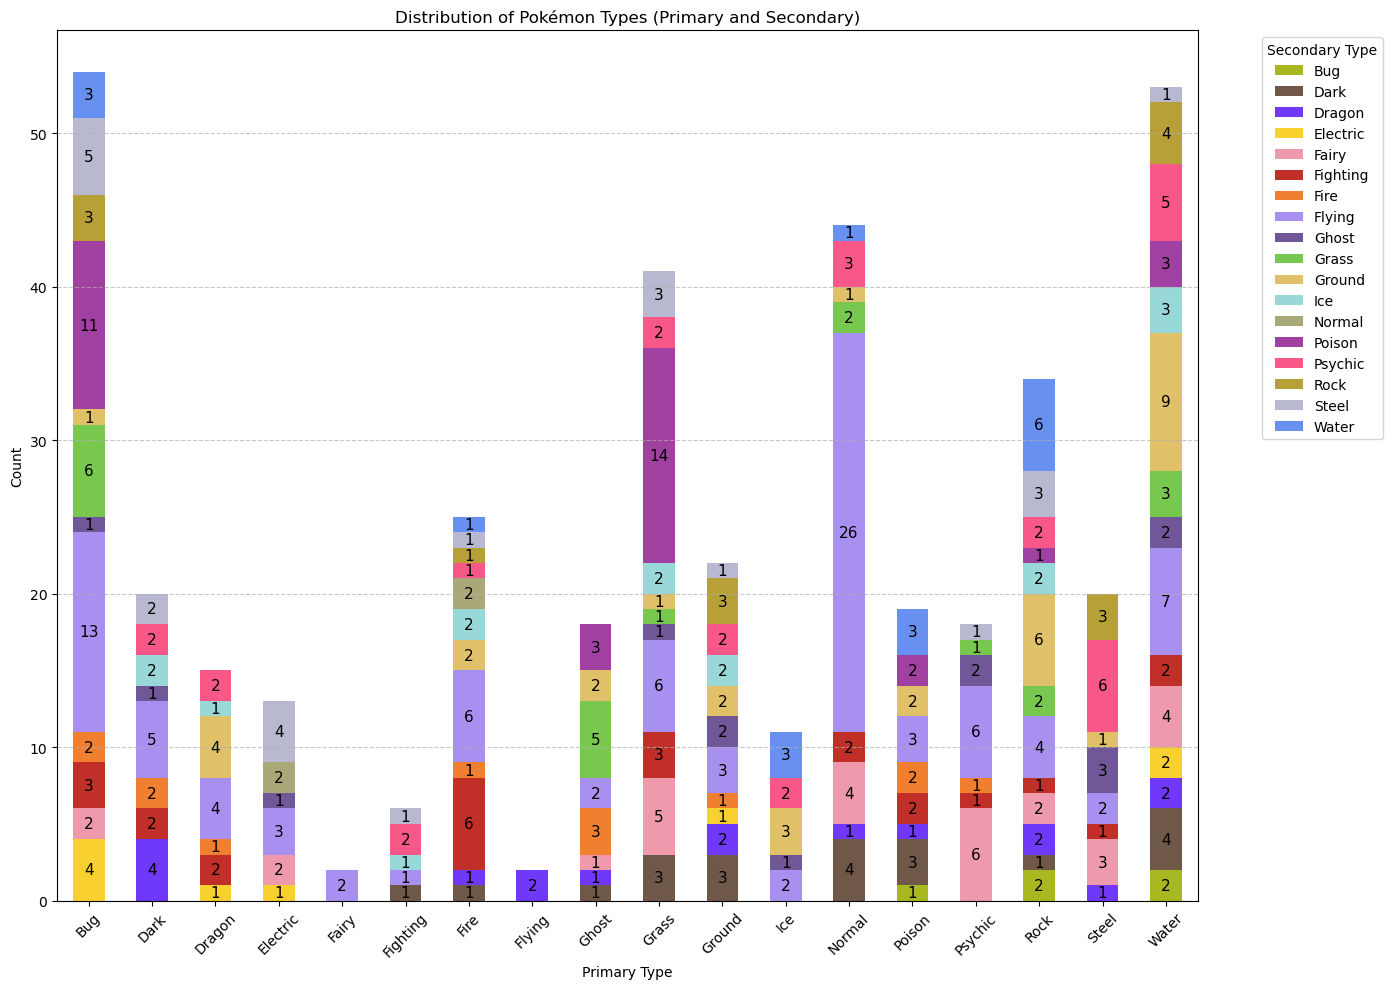

In [14]:
colors = [pokemon_colors.get(col, '#000000') for col in pivot_df.columns]
ax = pivot_df.plot(kind='bar',stacked=True,figsize=(14,10), color=colors)

#for container in ax.containers:
#    # Add labels to each bar in the container
#    ax.bar_label(container, label_type='center')
    
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            # Adding a small visible bar for labels with height 0
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y(), '')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, int(height), ha='center', va='center', fontsize=11)

    
plt.title('Distribution of Pokémon Types (Primary and Secondary)')
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Secondary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Podobnie jak wyżej w grafie słupkowym tak jak i na Heat mapie widzimy jak ma się dystrybucja każdego z typów

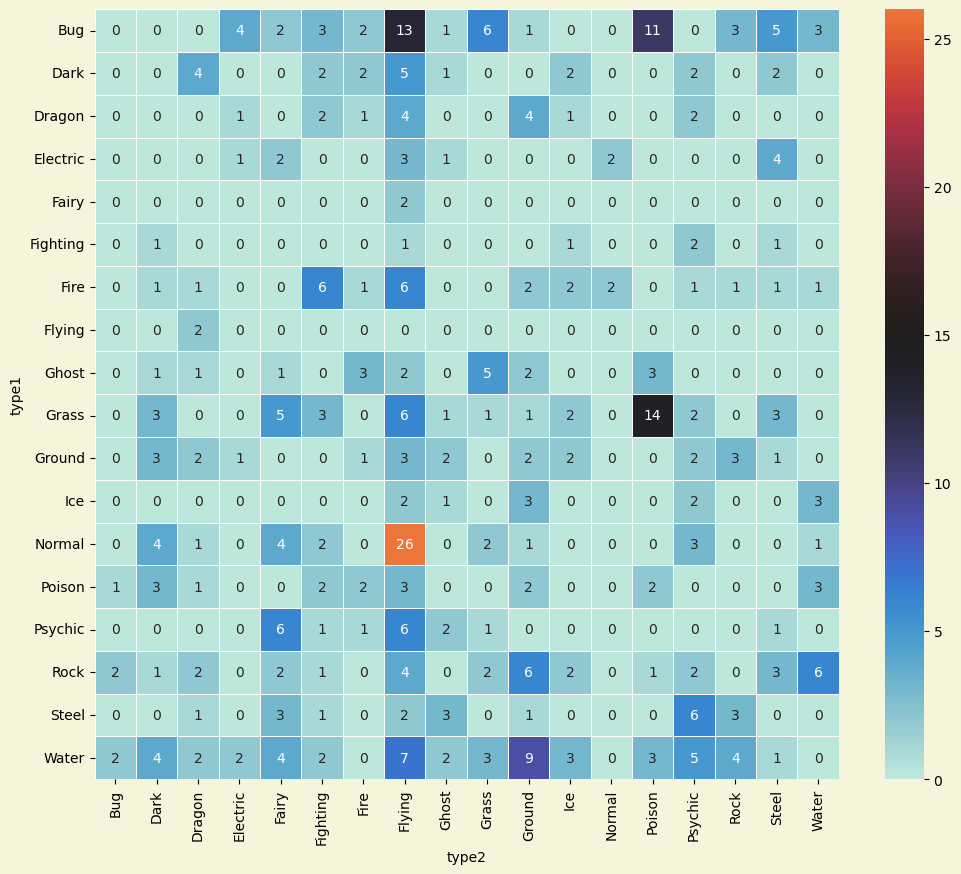

In [15]:
fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(pivot_df ,annot= True ,cmap="icefire",linewidths=.5,center=15)
fig.patch.set_facecolor('beige')


### W trakcie pracy na tej bazie danych zauważyłem że jeden z pokemonów ma type1 taki sam jak type2. Jest to pokemon z pokemon_indexem = 491. Wykorzystałem ten niby błąd o utworzenia zbiorczego wykresu i heatmapy.

In [16]:
PokemonDB.query('type1 == "Grass" & type2 == "Grass"')
PokemonDB

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,7,Steel,Flying,Launch Pokémon,1,101,107,103,...,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
797,798,Kartana,7,Grass,Steel,Drawn Sword Pokémon,1,181,59,131,...,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
798,799,Guzzlord,7,Dark,Dragon,Junkivore Pokémon,1,101,97,53,...,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5
799,800,Necrozma,7,Psychic,NaN,Prism Pokémon,1,107,127,101,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


In [17]:
df= PokemonDB.loc[491]
PokemonDB

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,NaN,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,NaN,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,7,Steel,Flying,Launch Pokémon,1,101,107,103,...,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
797,798,Kartana,7,Grass,Steel,Drawn Sword Pokémon,1,181,59,131,...,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
798,799,Guzzlord,7,Dark,Dragon,Junkivore Pokémon,1,101,97,53,...,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5
799,800,Necrozma,7,Psychic,NaN,Prism Pokémon,1,107,127,101,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


### [Debuging?] Wyszukiwanie duplikatów w kolumnie type1 i type2 i zamiana ich na NaN

### do pokemonów bez typu pobocznego dodałem tam duplikat typu głównego aby wykorzystać te inforamcje na wizualizacjach

In [18]:
condition = PokemonDB['type2'].isna()
PokemonDB2 = PokemonDB
PokemonDB2.loc[condition, 'type2'] = PokemonDB['type1']
PokemonDB2.loc[491,["name","type1","type2"]]
PokemonDB

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,Fire,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,Fire,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,7,Steel,Flying,Launch Pokémon,1,101,107,103,...,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
797,798,Kartana,7,Grass,Steel,Drawn Sword Pokémon,1,181,59,131,...,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
798,799,Guzzlord,7,Dark,Dragon,Junkivore Pokémon,1,101,97,53,...,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5
799,800,Necrozma,7,Psychic,Psychic,Prism Pokémon,1,107,127,101,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


In [19]:
PokemonDB

,pokedex_number,name,generation,type1,type2,classfication,is_legendary,attack,sp_attack,defense,...,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
0,1,Bulbasaur,1,Grass,Poison,Seed Pokémon,0,49,65,49,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
1,2,Ivysaur,1,Grass,Poison,Seed Pokémon,0,62,80,63,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
2,3,Venusaur,1,Grass,Poison,Seed Pokémon,0,100,122,123,...,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5
3,4,Charmander,1,Fire,Fire,Lizard Pokémon,0,52,60,43,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
4,5,Charmeleon,1,Fire,Fire,Flame Pokémon,0,64,80,58,...,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,797,Celesteela,7,Steel,Flying,Launch Pokémon,1,101,107,103,...,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0
797,798,Kartana,7,Grass,Steel,Drawn Sword Pokémon,1,181,59,131,...,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5
798,799,Guzzlord,7,Dark,Dragon,Junkivore Pokémon,1,101,97,53,...,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5
799,800,Necrozma,7,Psychic,Psychic,Prism Pokémon,1,107,127,101,...,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0


### Poprawiony graf słupkowy

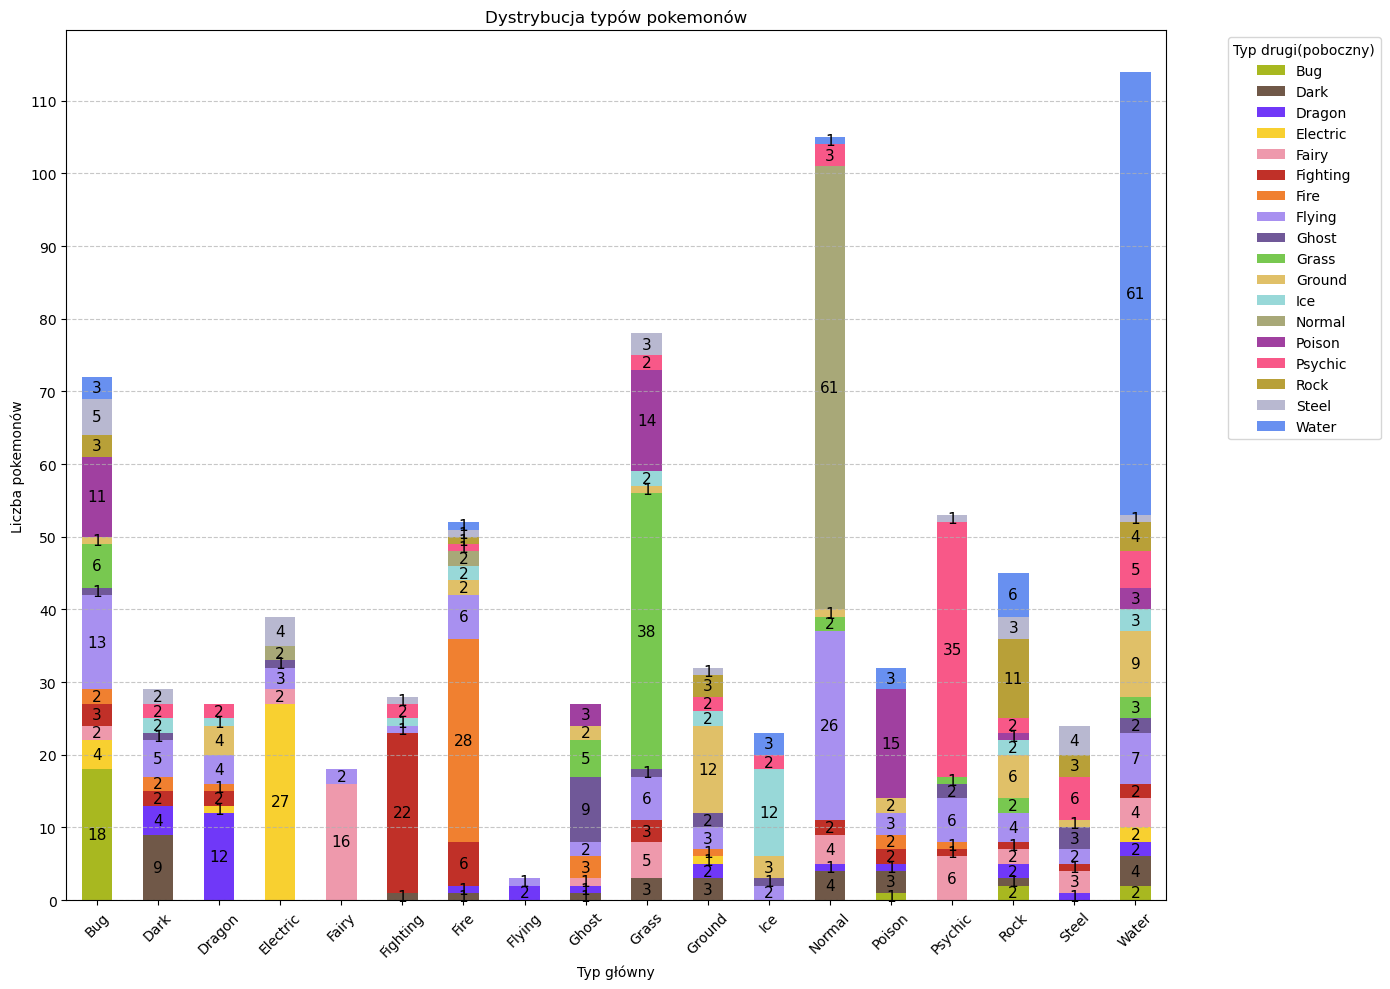

In [20]:
type_combination_counts = PokemonDB2.groupby(['type1', 'type2']).size().reset_index(name='count')

pivot_df = type_combination_counts.pivot(index='type1', columns='type2', values='count').fillna(0)

colors = [pokemon_colors.get(col, '#000000') for col in pivot_df.columns]
ax = pivot_df.plot(kind='bar',stacked=True,figsize=(14,10), color=colors)

for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height == 0:
            # Adding a small visible bar for labels with height 0
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y(), '')
        else:
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, int(height), ha='center', va='center', fontsize=11)
        
ax.yaxis.set_major_locator(MultipleLocator(10))

plt.title('Dystrybucja typów pokemonów')
plt.xlabel('Typ główny')
plt.ylabel('Liczba pokemonów')
plt.xticks(rotation=45)
plt.legend(title='Typ drugi(poboczny)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Poprawiona heatmapa

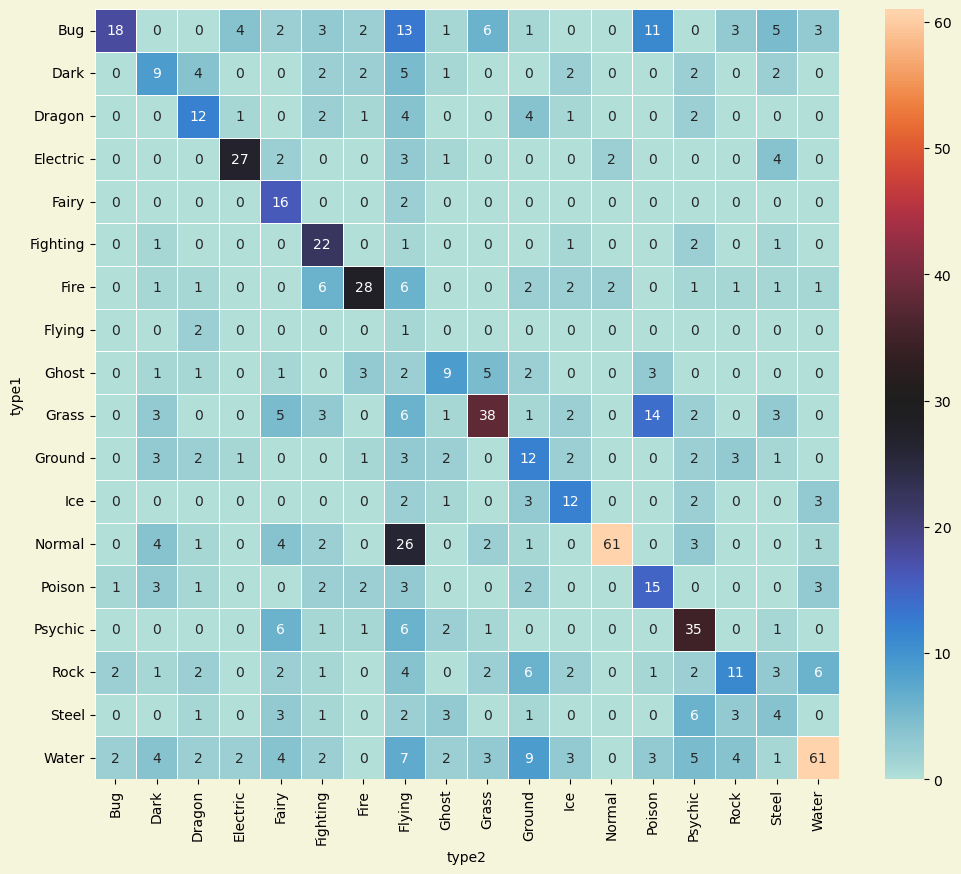

In [21]:
fig, ax = plt.subplots(figsize=(12,10))
color = sns.color_palette("icefire", as_cmap=True)
ax = sns.heatmap(pivot_df ,annot=True, cmap=color ,linewidths=.5,center=30)
sns.color_palette("cubehelix")
fig.patch.set_facecolor('beige')


## 2. Heatmapa Efektywności typów względem siebie 
### Zwizualizowanie tablicy Typing_Chart za pomocą Heatmapy gdzie możemy zaobserwować silne i słabsze strony każdego z typów

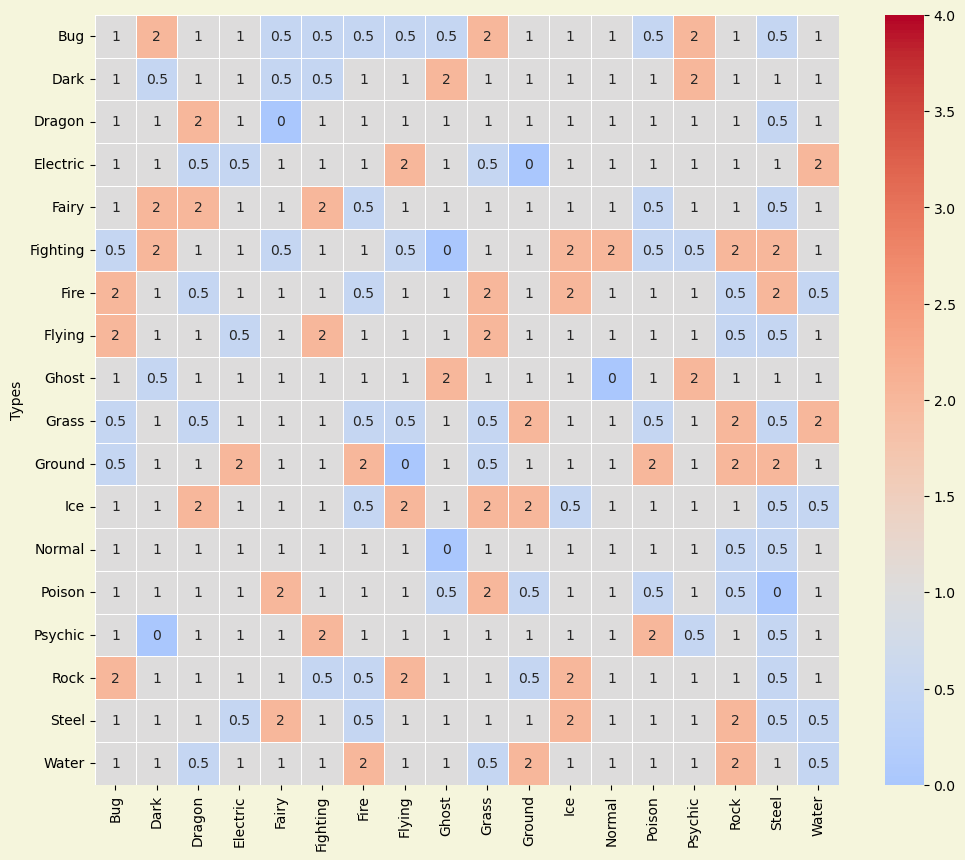

In [22]:
#colors = ['plum','lightblue','khaki', 'lightgreen']
colors = sns.color_palette("coolwarm", as_cmap=True)

fig, ax = plt.subplots(figsize=(12,10))
ax = sns.heatmap(TypingChart ,annot= True, cmap=colors ,linewidths=.5,center=1,vmax=4)
fig.patch.set_facecolor('beige')

### 3. Korelacja typów i statystyk

In [23]:
type_stats = one_typedb[['type1','attack','sp_attack','defense','sp_defense','hp','speed']]
type_stats = type_stats.groupby('type1').mean()
type_stats.to_csv('type_stats.csv')
type_stats

,attack,sp_attack,defense,sp_defense,hp,speed
type1,,,,,,
Bug,52.666667,40.722222,58.166667,45.944444,52.722222,48.944444
Dark,84.222222,82.000000,61.333333,61.888889,60.000000,83.555556
Dragon,89.083333,58.583333,66.916667,69.416667,60.416667,59.500000
Electric,69.730769,82.230769,56.500000,67.038462,60.500000,82.692308
Fairy,64.250000,79.187500,65.437500,85.000000,74.437500,52.875000
Fighting,97.454545,42.636364,63.681818,62.045455,71.363636,59.500000
Fire,77.370370,76.851852,57.592593,63.000000,61.111111,71.407407
Flying,100.000000,110.000000,80.000000,90.000000,79.000000,121.000000
Ghost,72.222222,72.333333,90.555556,92.333333,47.666667,51.666667


,attack,sp_attack,defense,sp_defense,hp,speed
attack,1.000000,-0.107638,0.401263,-0.034310,0.379993,0.156839
sp_attack,-0.107638,1.000000,-0.085474,0.614081,0.191304,0.768043
defense,0.401263,-0.085474,1.000000,0.467679,-0.008692,-0.295295
sp_defense,-0.034310,0.614081,0.467679,1.000000,0.108249,0.275621
hp,0.379993,0.191304,-0.008692,0.108249,1.000000,0.262257
speed,0.156839,0.768043,-0.295295,0.275621,0.262257,1.000000


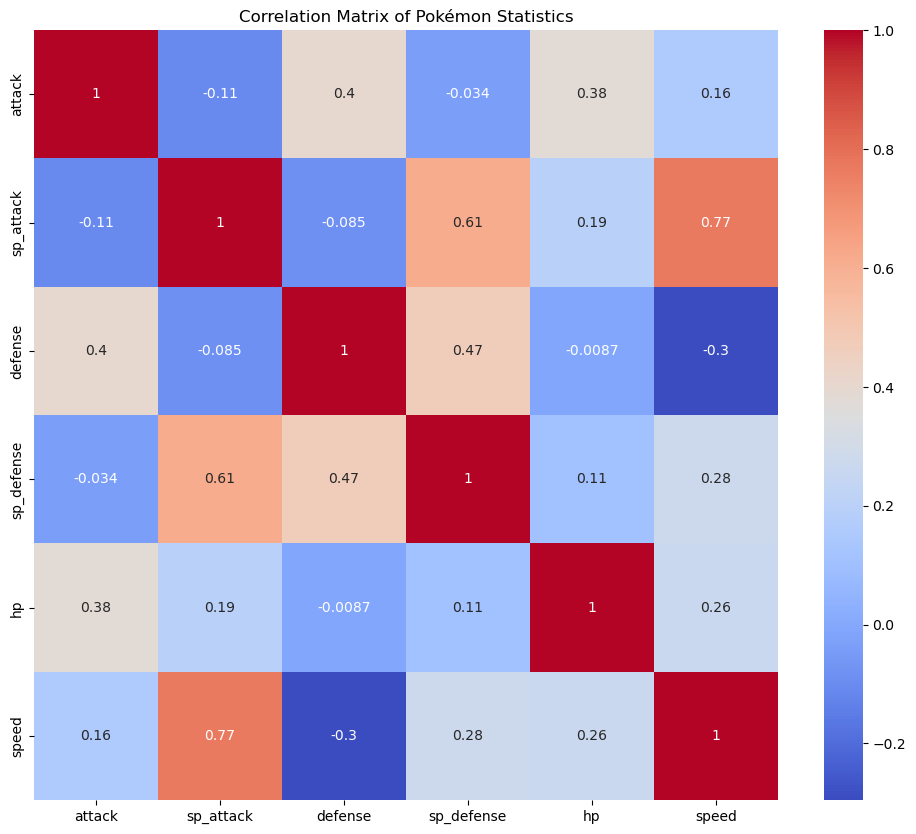

In [24]:
correlation_matrix = type_stats.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pokémon Statistics')
correlation_matrix

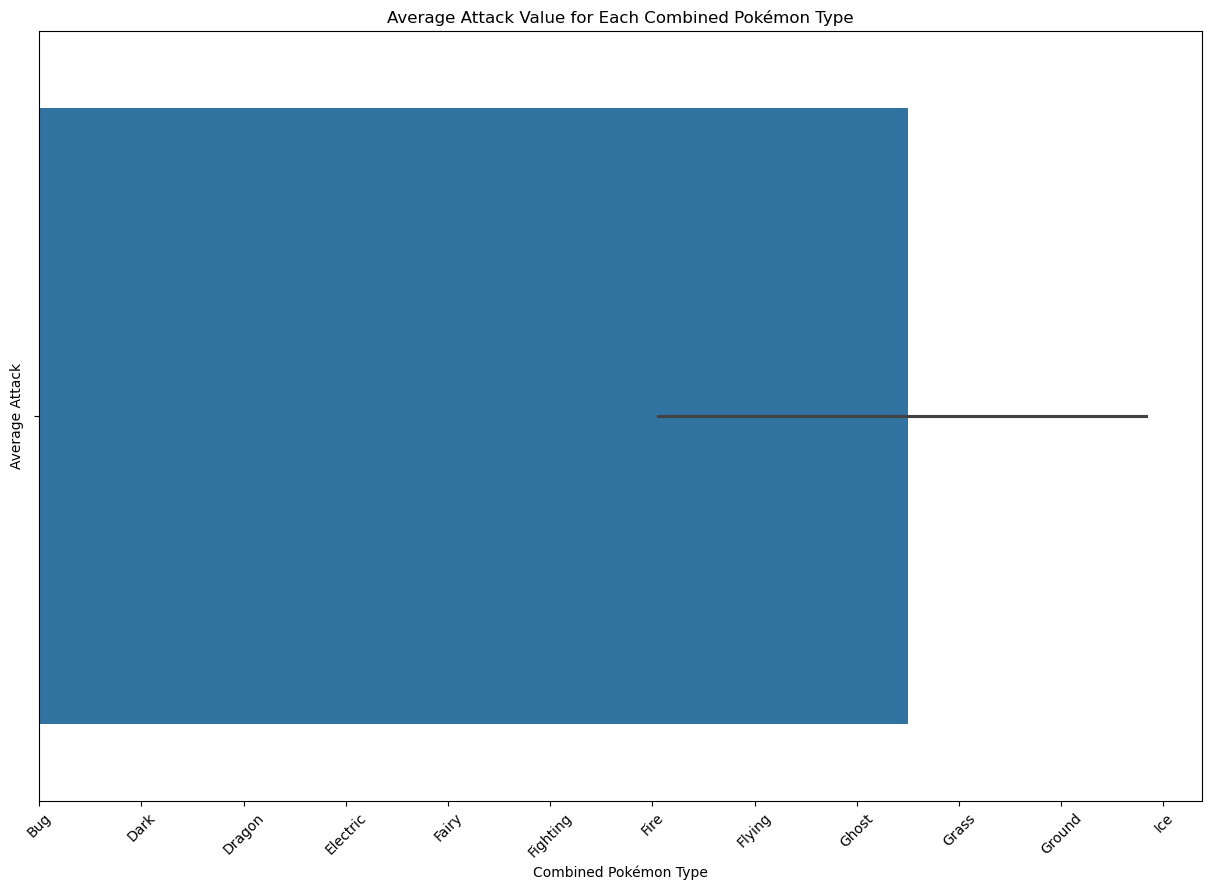

In [25]:
# Visualize the average statistics for each combined type
plt.figure(figsize=(15, 10))

# Create a bar plot for the average Attack values
sns.barplot(data=type_stats, x='type1')
plt.title('Average Attack Value for Each Combined Pokémon Type')
plt.xlabel('Combined Pokémon Type')
plt.ylabel('Average Attack')
plt.xticks(rotation=45)
plt.show()

In [26]:
PokemonDB = pd.read_csv(r'PokemonDB_updated.csv')
PokemonDB = PokemonDB.fillna('')
PokemonDB['CombinedTypes'] = PokemonDB['type1']+PokemonDB['type2']
CombinedTypes = PokemonDB
CombinedTypes = CombinedTypes[['CombinedTypes','attack','sp_attack','defense','sp_defense','hp','speed']]
CombinedTypes = CombinedTypes.groupby('CombinedTypes').mean()
CombinedTypes

,attack,sp_attack,defense,sp_defense,hp,speed
CombinedTypes,,,,,,
Bug,52.666667,40.722222,58.166667,45.944444,52.722222,48.944444
BugElectric,69.000000,88.500000,73.750000,65.000000,63.500000,63.000000
BugFairy,50.000000,75.000000,50.000000,55.000000,50.000000,104.000000
BugFighting,153.666667,76.666667,97.000000,65.000000,86.000000,101.666667
BugFire,72.500000,92.500000,60.000000,80.000000,70.000000,80.000000
...,...,...,...,...,...,...
WaterIce,83.333333,80.000000,113.333333,78.333333,90.000000,66.666667
WaterPoison,68.333333,61.666667,61.666667,91.666667,61.666667,85.000000
WaterPsychic,79.000000,88.000000,96.000000,77.000000,81.600000,56.400000


,attack,sp_attack,defense,sp_defense,hp,speed
attack,1.000000,0.213679,0.392037,0.165294,0.408242,0.271002
sp_attack,0.213679,1.000000,0.105666,0.529813,0.425180,0.390214
defense,0.392037,0.105666,1.000000,0.438231,0.107122,-0.244709
sp_defense,0.165294,0.529813,0.438231,1.000000,0.235735,0.120300
hp,0.408242,0.425180,0.107122,0.235735,1.000000,0.189594
speed,0.271002,0.390214,-0.244709,0.120300,0.189594,1.000000


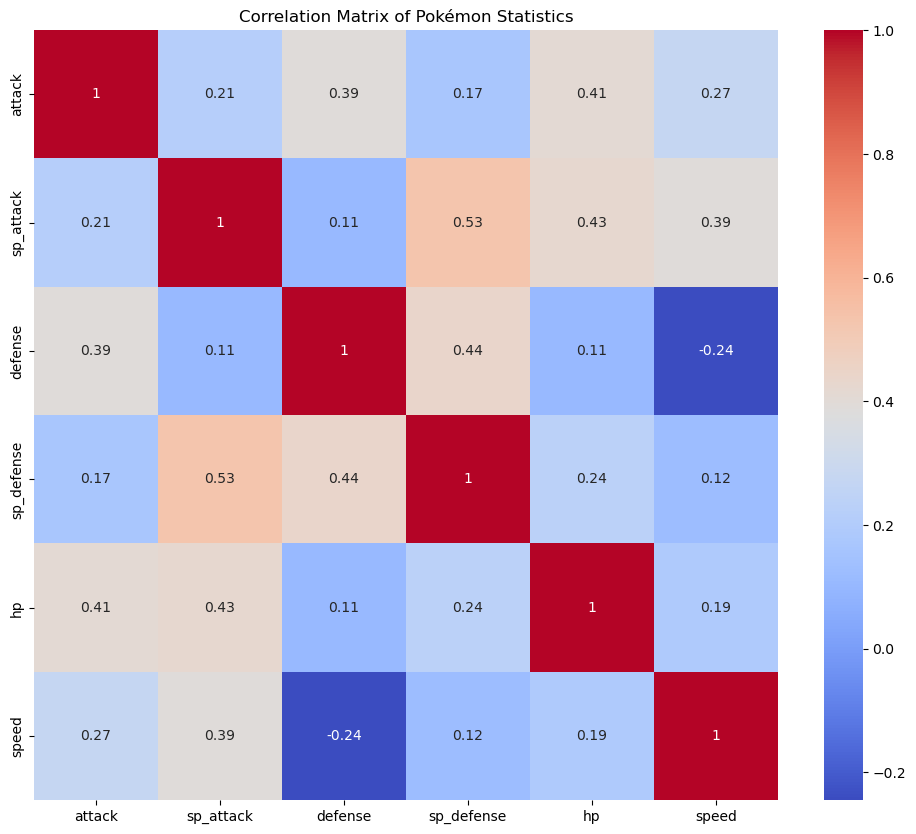

In [27]:
correlation_matrix = CombinedTypes.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pokémon Statistics')
correlation_matrix

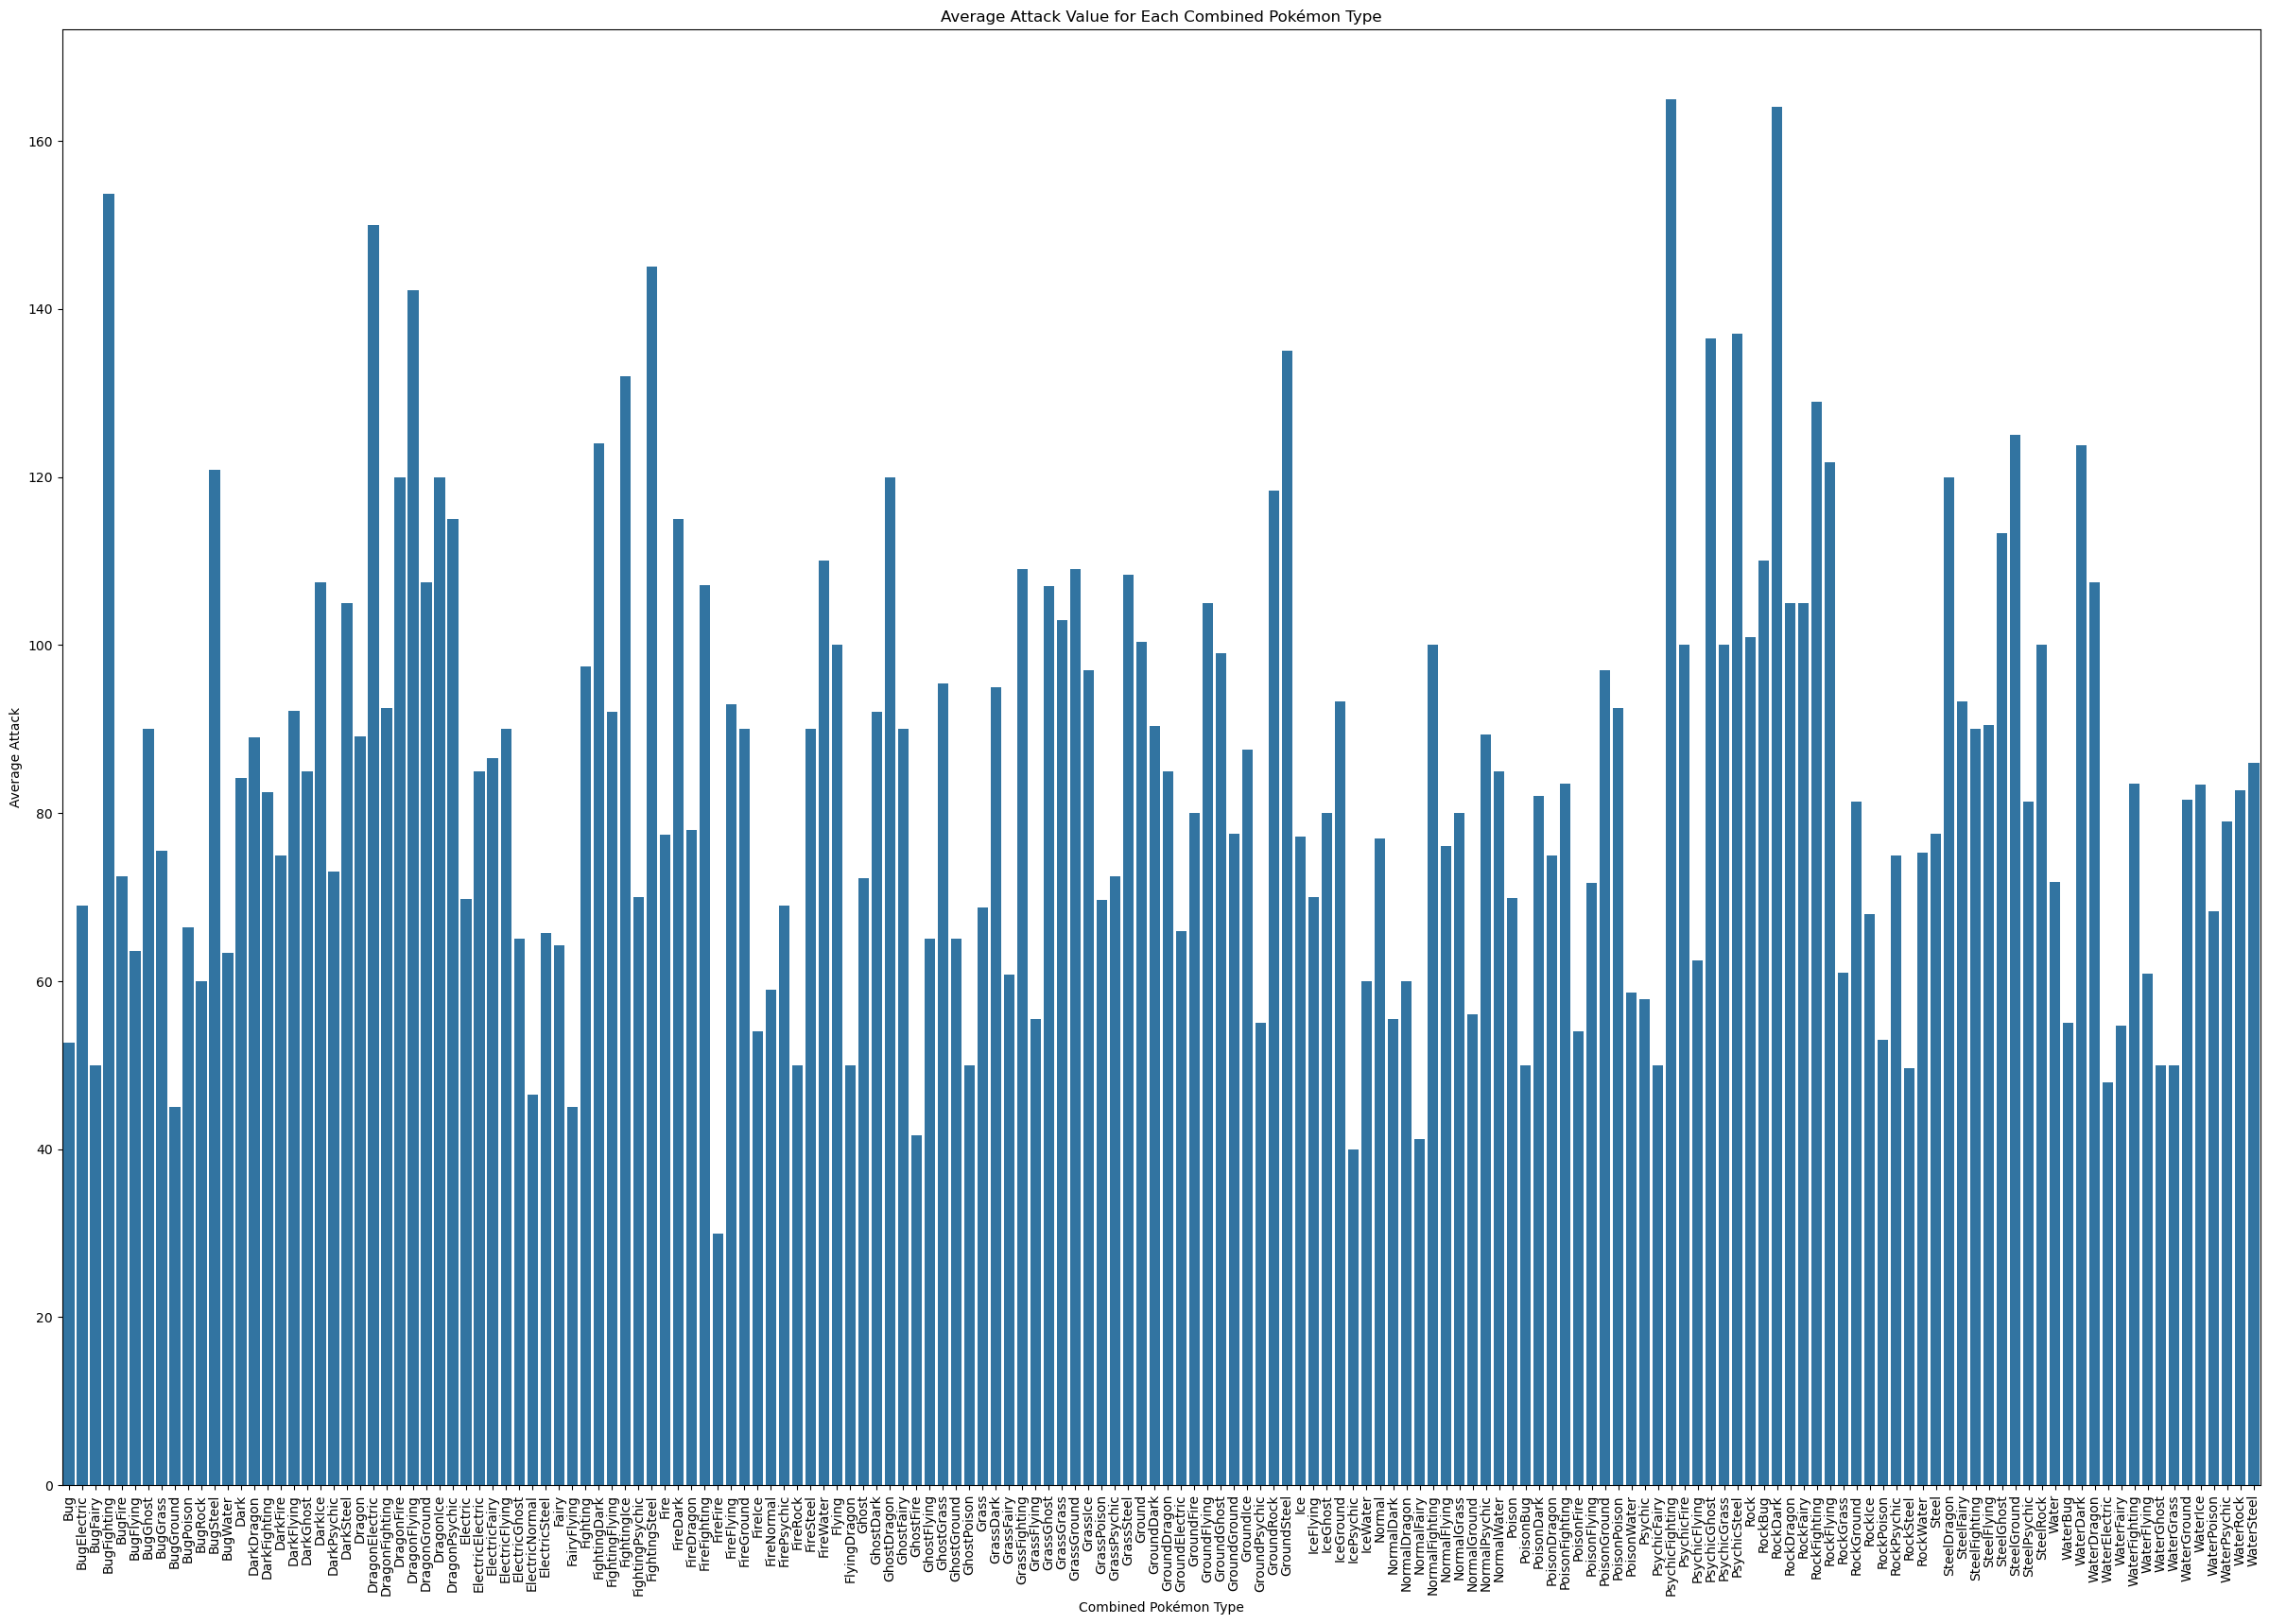

In [28]:
# Visualize the average statistics for each combined type
plt.figure(figsize=(30, 20))

# Create a bar plot for the average Attack values
sns.barplot(data=CombinedTypes, x='CombinedTypes', y='attack')
plt.title('Average Attack Value for Each Combined Pokémon Type')
plt.xlabel('Combined Pokémon Type')
plt.ylabel('Average Attack')
plt.xticks(rotation=90)
plt.show()

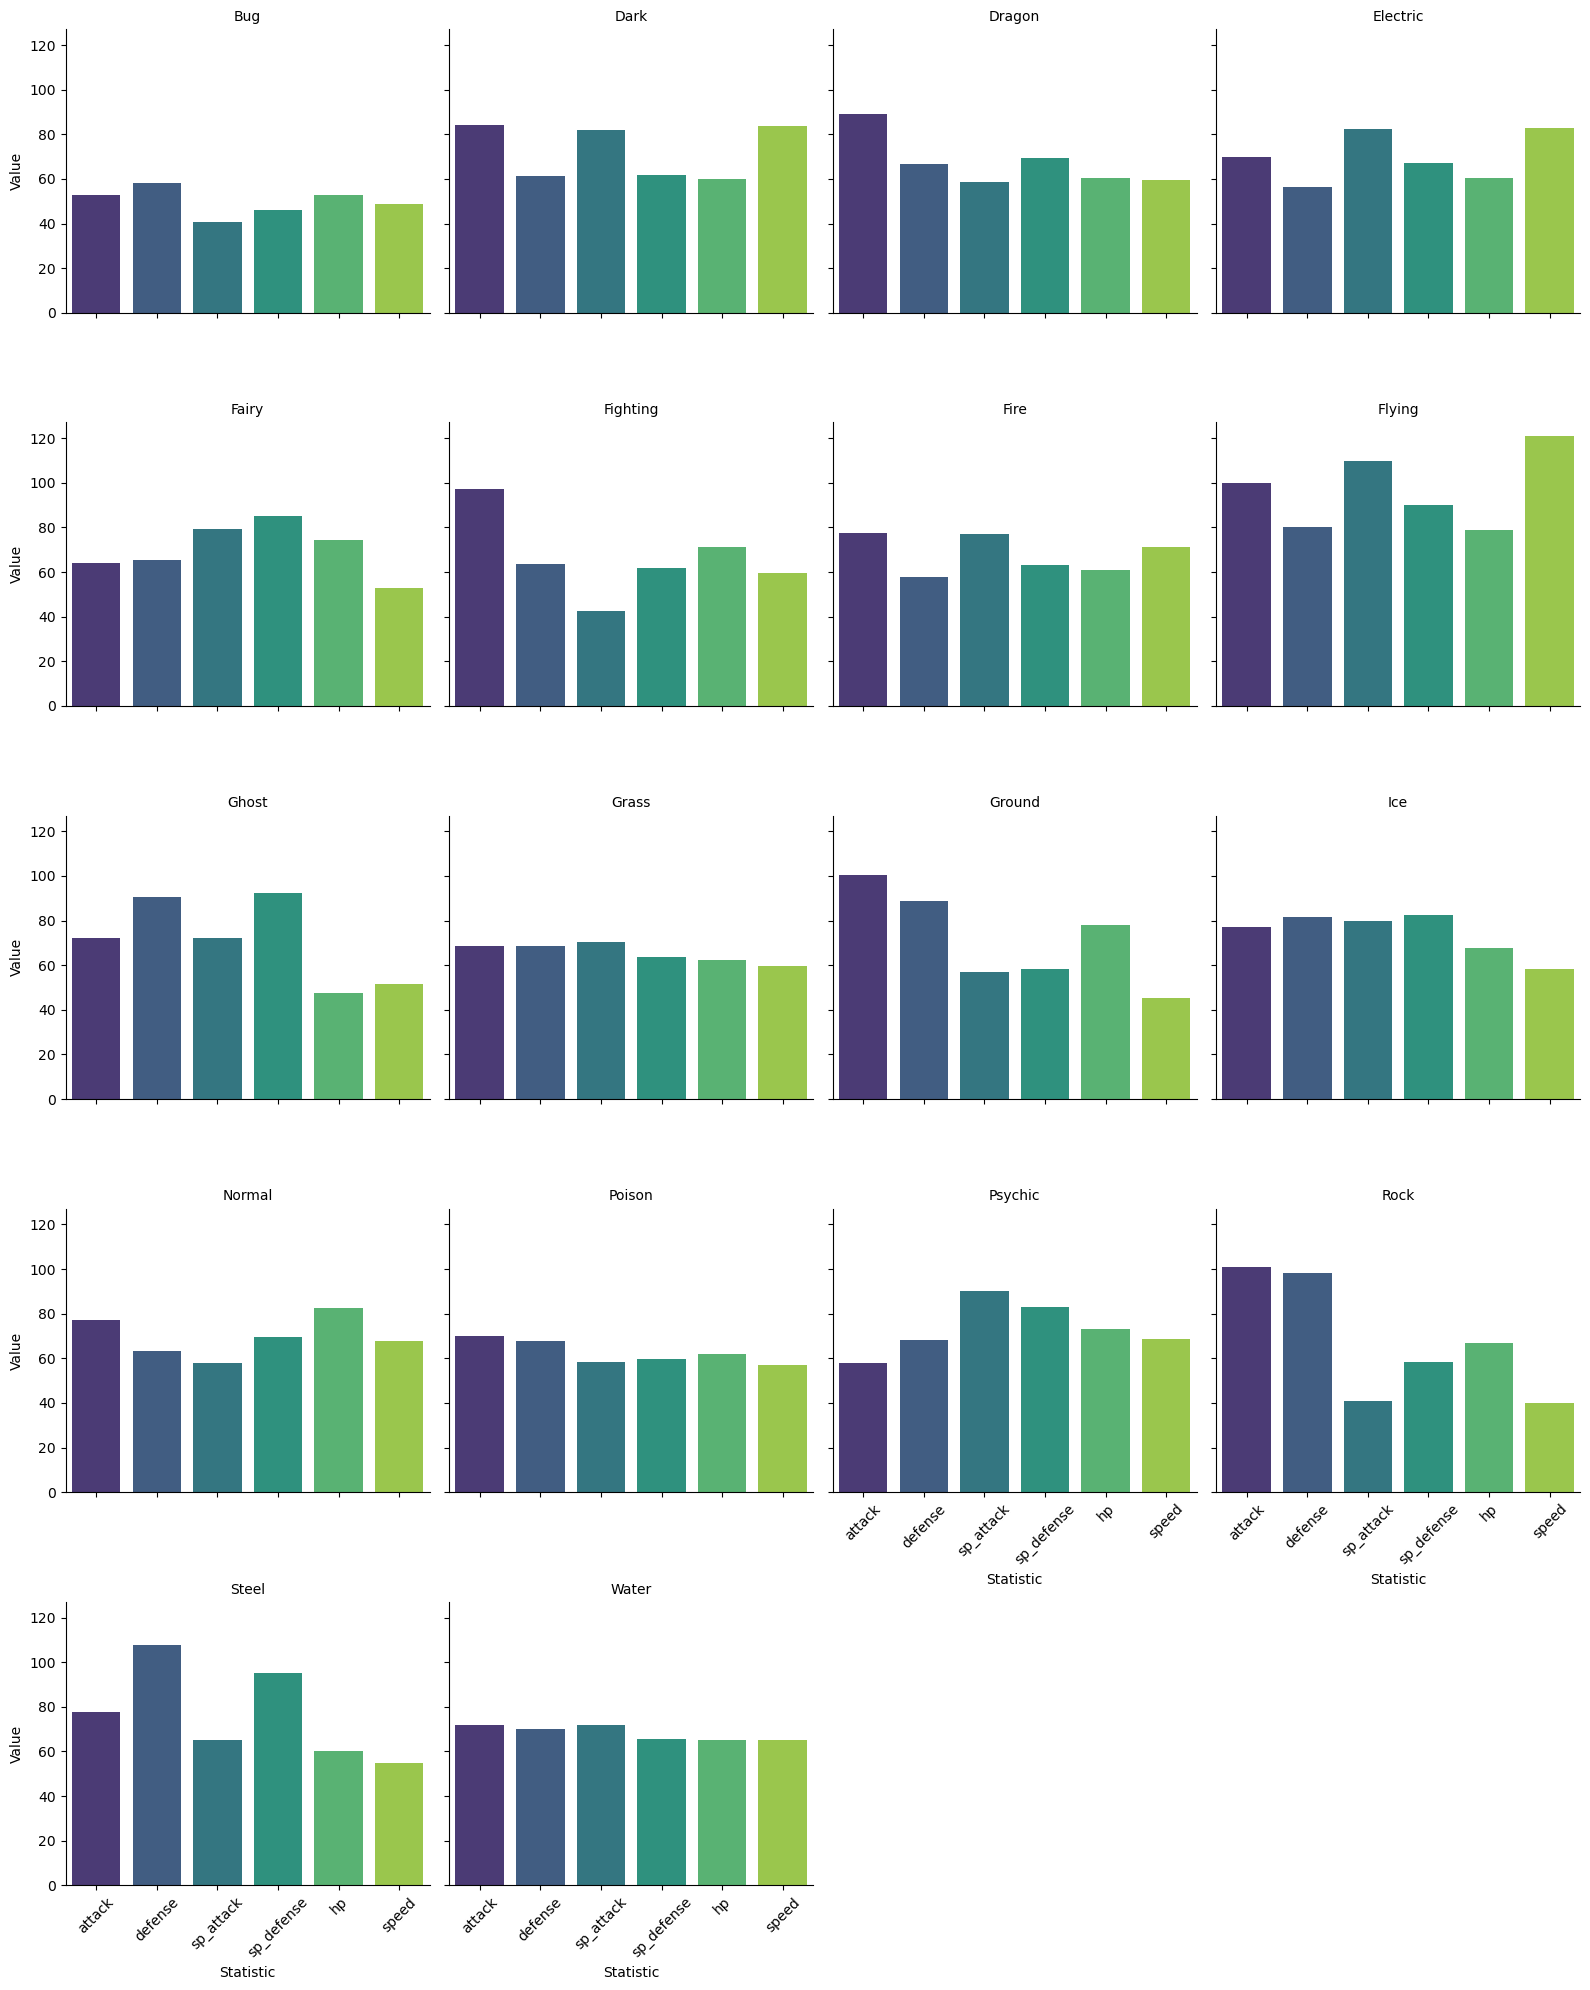

In [29]:
type_stats.reset_index(inplace=True)
# Melt the DataFrame to long format
melted_data = pd.melt(type_stats, id_vars=['type1'], 
                      value_vars=['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'speed'],
                      var_name='Statistic', value_name='Value')

# Create the FacetGrid
g = sns.FacetGrid(melted_data, col="type1", col_wrap=4, sharey=True, height=4)
g.map_dataframe(sns.barplot, x='Statistic', y='Value', palette="viridis",hue='Statistic',legend=False)

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Adjust the layout
g.set_axis_labels("Statistic", "Value")
g.set_titles(col_template="{col_name}")
g.fig.tight_layout()

plt.show()


In [30]:
type_stats = type_stats.set_index("type1")
type_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Bug to Water
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   attack      18 non-null     float64
 1   sp_attack   18 non-null     float64
 2   defense     18 non-null     float64
 3   sp_defense  18 non-null     float64
 4   hp          18 non-null     float64
 5   speed       18 non-null     float64
dtypes: float64(6)
memory usage: 1008.0+ bytes


In [31]:
#import plotly.express as px
#for i in range(len(type_stats.index)):
#    df = pd.DataFrame(dict(
#        value = type_stats.iloc[i].tolist(),
#        stat=['attack','defens','sp_attack', 'sp_defense','hp','speed']))
#    
#    fig = px.line_polar(df, r='value', theta='stat', line_close=True)
#    fig.update_traces(fill='toself')
#    fig.show()

In [32]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
num_rows = 6
num_cols = 3

# Create a subplot grid
fig = make_subplots(rows=num_rows, cols=num_cols, specs=[[{'type': 'polar'}] * num_cols] * num_rows)

# Add polar plots to the grid
for i in range(len(type_stats.index)):
    row = i // num_cols + 1
    col = i % num_cols + 1

    df = pd.DataFrame(dict(
        value=type_stats.iloc[i].tolist(),
        stat=['attack', 'defense', 'sp_attack', 'sp_defense', 'hp', 'speed']
    ))
    
    hover_text = [f"{stat}: {value:.1f}" for stat, value in zip(df['stat'], df['value'])]
    labels = [f"{stat}: {value:.1f}" for stat, value in zip(df['stat'], df['value'])]

    polar_plot = go.Scatterpolar(
        r=df['value'],
        theta=df['stat'],
        fill='toself',
        name=type_stats.index[i],
        line=dict(color=pokemon_colors.get(type_stats.index[i], 'black')),
        hoverinfo='text+name',  # Include text and name
        text=labels,
        textposition='top left'# Detailed hover text
    )

    fig.add_trace(polar_plot, row=row, col=col)
    
    # Update layout for polar plots in grid
for row in range(1, num_rows + 1):
    for col in range(1, num_cols + 1):
        fig.update_polars(
            row=row, col=col,
            radialaxis=dict(
                tickfont=dict(size=10),
                range=[0, 130]
            ),
            angularaxis=dict(
                tickfont=dict(size=10)
            )
        )

# Update layout
fig.update_layout(
    title_text="Polar Plots in Grid Layout",
    showlegend = False,
    height=400 * num_rows,  # Adjust height based on number of rows
    width=1200,  # Adjust width as needed
    title_font_size=20,
    
    margin=dict(t=100, b=50, l=100, r=100)  # Adjust margins as needed
)

In [33]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
    r=[1, 5, 2, 2, 3],
    theta=['processing cost', 'mechanical properties', 'chemical stability', 'thermal stability', 'device integration'],
    fill='toself',
    fillcolor='rgba(0, 100, 200, 0.3)',  # Set fill color with some transparency
    line=dict(color='blue', width=2),   # Set line color and width
    marker=dict(size=8, color='red')    # Set marker size and color
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 6])  # Set radial axis range
    ),
    showlegend=False  # Hide legend if not needed
)

fig.show()
